In [92]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
import matplotlib.pyplot as plt
from xgboost import XGBRegressor, plot_importance
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_regression


In [94]:
hpi_index = pd.read_csv("/Users/julius/Personal/Personal_Project/House_market_analysis/Global-Housing-Market-Analysis/Dataset/House_market_with_coordinate.csv")

In [95]:
hpi_index

,Country,Year,House Price Index,Rent Index,Affordability Ratio,Mortgage Rate (%),Inflation Rate (%),GDP Growth (%),Population Growth (%),Urbanization Rate (%),Construction Index,country_code,latitude,longitude,HPI_YoY_Change
0,Australia,2015,151.334959,112.664479,7.605097,4.160567,1.196618,1.579299,0.864160,67.274115,91.539458,AU,-25.274398,133.775136,NaN
1,Australia,2016,117.728416,51.404984,5.898712,2.557240,2.628733,-1.041903,2.116845,77.807774,124.328186,AU,-25.274398,133.775136,-22.206728
2,Australia,2017,158.917124,84.890954,3.782283,4.185533,4.314467,3.963516,0.510808,63.827409,92.702072,AU,-25.274398,133.775136,34.986207
3,Australia,2018,116.308230,95.214207,8.137005,3.280484,6.912349,2.846199,-0.169706,63.053474,82.228731,AU,-25.274398,133.775136,-26.812022
4,Australia,2019,104.595773,61.247696,4.679103,2.925476,1.626928,5.174123,-0.719182,75.735342,102.831746,AU,-25.274398,133.775136,-10.070187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,USA,2020,146.252228,71.819775,7.680612,4.233551,1.701554,5.756677,1.712965,88.184968,141.586188,US,37.090240,-95.712891,32.401236
196,USA,2021,139.789998,114.531196,3.796433,2.479914,0.793977,0.602643,0.360371,68.140471,136.299001,US,37.090240,-95.712891,-4.418552
197,USA,2022,115.675333,69.665416,7.884265,2.204621,5.714280,-1.403595,2.454104,83.167343,85.897255,US,37.090240,-95.712891,-17.250637
198,USA,2023,80.552212,107.082300,9.361716,5.145036,5.513257,-1.407643,0.254630,63.476072,139.048274,US,37.090240,-95.712891,-30.363536


In [96]:
hpi_index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                200 non-null    object 
 1   Year                   200 non-null    int64  
 2   House Price Index      200 non-null    float64
 3   Rent Index             200 non-null    float64
 4   Affordability Ratio    200 non-null    float64
 5   Mortgage Rate (%)      200 non-null    float64
 6   Inflation Rate (%)     200 non-null    float64
 7   GDP Growth (%)         200 non-null    float64
 8   Population Growth (%)  200 non-null    float64
 9   Urbanization Rate (%)  200 non-null    float64
 10  Construction Index     200 non-null    float64
 11  country_code           200 non-null    object 
 12  latitude               200 non-null    float64
 13  longitude              200 non-null    float64
 14  HPI_YoY_Change         180 non-null    float64
dtypes: flo

In [97]:
hpi_index.describe()

,Year,House Price Index,Rent Index,Affordability Ratio,Mortgage Rate (%),Inflation Rate (%),GDP Growth (%),Population Growth (%),Urbanization Rate (%),Construction Index,latitude,longitude,HPI_YoY_Change
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,180.000000
mean,2019.500000,130.381022,83.048370,7.237768,4.150621,3.649756,2.133722,0.722806,74.769891,111.204257,32.724410,22.936468,4.867693
std,2.879489,28.752229,21.439858,2.576085,1.380222,1.881938,2.413270,1.035691,8.734246,24.309473,26.356695,73.957442,33.349022
min,2015.000000,80.552212,50.354311,3.041688,1.537814,0.532110,-1.921833,-0.961391,60.172760,70.968678,-30.559482,-106.346771,-49.428517
25%,2017.000000,104.142562,60.466671,5.034207,3.045278,1.939199,-0.095628,-0.183320,66.923842,90.182198,23.581895,-3.514285,-18.631018
50%,2019.500000,129.193653,83.721711,7.375697,4.329643,3.664625,2.307548,0.722372,75.100060,110.593807,38.776954,11.509453,-0.873341
75%,2022.000000,157.127098,100.604665,9.276196,5.217706,5.261720,4.272776,1.621317,82.677430,133.780445,51.407426,85.271009,21.902784
max,2024.000000,179.971767,119.855388,11.879671,6.485623,6.912349,5.958931,2.497948,89.788944,149.735748,61.524010,138.252924,101.985505


In [98]:
#Feature engineering
hpi_index['Year_num'] = hpi_index['Year']
hpi_index['HPI_lag_1'] = hpi_index.groupby('Country')['House Price Index'].shift(1)
hpi_index['HPI_lag_2'] = hpi_index.groupby('Country')['House Price Index'].shift(2)
hpi_index['HPI_roll_mean_3'] = hpi_index.groupby('Country')['House Price Index'].rolling(3).mean().reset_index(0, drop=True)
hpi_index['HPI_roll_std_3'] = hpi_index.groupby('Country')['House Price Index'].rolling(3).std().reset_index(0, drop=True)

#more feature engineering
hpi_index['Period'] = hpi_index['Year'].apply(lambda x: 'Pre-COVID' if x <= 2019 else 'Post-COVID')
hpi_index['Economic_Stress'] = hpi_index['Inflation Rate (%)'] + hpi_index['Mortgage Rate (%)'] - hpi_index['GDP Growth (%)']


In [99]:
hpi_index

,Country,Year,House Price Index,Rent Index,Affordability Ratio,Mortgage Rate (%),Inflation Rate (%),GDP Growth (%),Population Growth (%),Urbanization Rate (%),...,latitude,longitude,HPI_YoY_Change,Year_num,HPI_lag_1,HPI_lag_2,HPI_roll_mean_3,HPI_roll_std_3,Period,Economic_Stress
0,Australia,2015,151.334959,112.664479,7.605097,4.160567,1.196618,1.579299,0.864160,67.274115,...,-25.274398,133.775136,NaN,2015,NaN,NaN,NaN,NaN,Pre-COVID,3.777887
1,Australia,2016,117.728416,51.404984,5.898712,2.557240,2.628733,-1.041903,2.116845,77.807774,...,-25.274398,133.775136,-22.206728,2016,151.334959,NaN,NaN,NaN,Pre-COVID,6.227876
2,Australia,2017,158.917124,84.890954,3.782283,4.185533,4.314467,3.963516,0.510808,63.827409,...,-25.274398,133.775136,34.986207,2017,117.728416,151.334959,142.660166,21.921825,Pre-COVID,4.536484
3,Australia,2018,116.308230,95.214207,8.137005,3.280484,6.912349,2.846199,-0.169706,63.053474,...,-25.274398,133.775136,-26.812022,2018,158.917124,117.728416,130.984590,24.200704,Pre-COVID,7.346634
4,Australia,2019,104.595773,61.247696,4.679103,2.925476,1.626928,5.174123,-0.719182,75.735342,...,-25.274398,133.775136,-10.070187,2019,116.308230,158.917124,126.607042,28.587610,Pre-COVID,-0.621719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,USA,2020,146.252228,71.819775,7.680612,4.233551,1.701554,5.756677,1.712965,88.184968,...,37.090240,-95.712891,32.401236,2020,110.461377,131.423444,129.379016,17.982798,Post-COVID,0.178428
196,USA,2021,139.789998,114.531196,3.796433,2.479914,0.793977,0.602643,0.360371,68.140471,...,37.090240,-95.712891,-4.418552,2021,146.252228,110.461377,132.167868,19.074038,Post-COVID,2.671249
197,USA,2022,115.675333,69.665416,7.884265,2.204621,5.714280,-1.403595,2.454104,83.167343,...,37.090240,-95.712891,-17.250637,2022,139.789998,146.252228,133.905853,16.115335,Post-COVID,9.322496
198,USA,2023,80.552212,107.082300,9.361716,5.145036,5.513257,-1.407643,0.254630,63.476072,...,37.090240,-95.712891,-30.363536,2023,115.675333,139.789998,112.005847,29.788885,Post-COVID,12.065936


Since there are Nan value I'm going to use mean to filled in the NaN Value

In [100]:
hpi_index['HPI_lag_1'] = hpi_index['HPI_lag_1'].fillna(hpi_index['House Price Index'].shift(1).mean())
hpi_index['HPI_lag_2'] = hpi_index['HPI_lag_2'].fillna(hpi_index['House Price Index'].shift(2).mean())
hpi_index['HPI_roll_mean_3'] = hpi_index['HPI_roll_mean_3'].fillna(hpi_index['House Price Index'].rolling(3).mean().mean())
hpi_index['HPI_roll_std_3'] = hpi_index['HPI_roll_std_3'].fillna(hpi_index['House Price Index'].rolling(3).std().mean())

In [101]:
hpi_index = pd.get_dummies(hpi_index, columns=['Period'], drop_first=True)

In [102]:
hpi_index

,Country,Year,House Price Index,Rent Index,Affordability Ratio,Mortgage Rate (%),Inflation Rate (%),GDP Growth (%),Population Growth (%),Urbanization Rate (%),...,latitude,longitude,HPI_YoY_Change,Year_num,HPI_lag_1,HPI_lag_2,HPI_roll_mean_3,HPI_roll_std_3,Economic_Stress,Period_Pre-COVID
0,Australia,2015,151.334959,112.664479,7.605097,4.160567,1.196618,1.579299,0.864160,67.274115,...,-25.274398,133.775136,NaN,2015,130.320978,130.572335,130.375426,26.121754,3.777887,True
1,Australia,2016,117.728416,51.404984,5.898712,2.557240,2.628733,-1.041903,2.116845,77.807774,...,-25.274398,133.775136,-22.206728,2016,151.334959,130.572335,130.375426,26.121754,6.227876,True
2,Australia,2017,158.917124,84.890954,3.782283,4.185533,4.314467,3.963516,0.510808,63.827409,...,-25.274398,133.775136,34.986207,2017,117.728416,151.334959,142.660166,21.921825,4.536484,True
3,Australia,2018,116.308230,95.214207,8.137005,3.280484,6.912349,2.846199,-0.169706,63.053474,...,-25.274398,133.775136,-26.812022,2018,158.917124,117.728416,130.984590,24.200704,7.346634,True
4,Australia,2019,104.595773,61.247696,4.679103,2.925476,1.626928,5.174123,-0.719182,75.735342,...,-25.274398,133.775136,-10.070187,2019,116.308230,158.917124,126.607042,28.587610,-0.621719,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,USA,2020,146.252228,71.819775,7.680612,4.233551,1.701554,5.756677,1.712965,88.184968,...,37.090240,-95.712891,32.401236,2020,110.461377,131.423444,129.379016,17.982798,0.178428,False
196,USA,2021,139.789998,114.531196,3.796433,2.479914,0.793977,0.602643,0.360371,68.140471,...,37.090240,-95.712891,-4.418552,2021,146.252228,110.461377,132.167868,19.074038,2.671249,False
197,USA,2022,115.675333,69.665416,7.884265,2.204621,5.714280,-1.403595,2.454104,83.167343,...,37.090240,-95.712891,-17.250637,2022,139.789998,146.252228,133.905853,16.115335,9.322496,False
198,USA,2023,80.552212,107.082300,9.361716,5.145036,5.513257,-1.407643,0.254630,63.476072,...,37.090240,-95.712891,-30.363536,2023,115.675333,139.789998,112.005847,29.788885,12.065936,False


In [103]:
X = hpi_index[features]
y = hpi_index[target]

selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(X, y)

# View scores and p-values
feature_scores = pd.DataFrame({
    'Feature': features,
    'F-Score': selector.scores_,
    'P-Value': selector.pvalues_
}).sort_values(by='F-Score', ascending=False)

print(feature_scores)

           Feature    F-Score       P-Value
2  HPI_roll_mean_3  70.396174  9.094152e-15
1       Rent Index   1.931136  1.661948e-01
0             Year   0.269876  6.039954e-01


In [104]:
#defining features and target
features = ['Year',"Rent Index",'HPI_roll_mean_3']
target = 'House Price Index'

In [105]:
#train Test Split
X = hpi_index[features]
y = hpi_index[target]

X_train = X[X['Year'] <= 2020]
X_test = X[X['Year'] > 2020]
y_train = y[X['Year'] <= 2020]
y_test = y[X['Year'] > 2020]

In [106]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [107]:
y_pred = model.predict(X_test)

In [108]:
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

MAE: 19.92540063563692
RMSE: 23.602024264918796


In [109]:
#train testing again for xgboost
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [110]:
model = XGBRegressor(n_estimators = 100, max_depth = 3, learning_rate = 0.1,objective='reg:squarederror')
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [111]:
X_train

,Year,Rent Index,HPI_roll_mean_3
79,2024,119.764579,174.523199
197,2022,69.665416,133.905853
38,2023,57.287601,107.640259
24,2019,110.251141,121.112766
122,2017,84.922171,103.438384
...,...,...,...
106,2021,96.774896,139.258536
14,2019,109.118458,135.988530
92,2017,99.572046,128.638569
179,2024,85.855534,151.808197


In [112]:
y_pred = model.predict(X_test)


In [113]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse:.2f}")

RMSE: 28.46


In [114]:
#Gridsearch to improve the result
params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [2, 3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb = XGBRegressor(random_state=42)
grid = GridSearchCV(xgb, param_grid=params, scoring='neg_root_mean_squared_error', cv=5)
grid.fit(X_train, y_train)

xgb = XGBRegressor(random_state=42)
grid = GridSearchCV(xgb, param_grid=params, scoring='neg_root_mean_squared_error', cv=5)
grid.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [2, 3, 5], 'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='neg_root_mean_squared_error')

In [115]:
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Best Parameters: {grid.best_params_}")
print(f"Test RMSE: {rmse:.2f}")

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 200, 'subsample': 0.8}
Test RMSE: 25.73


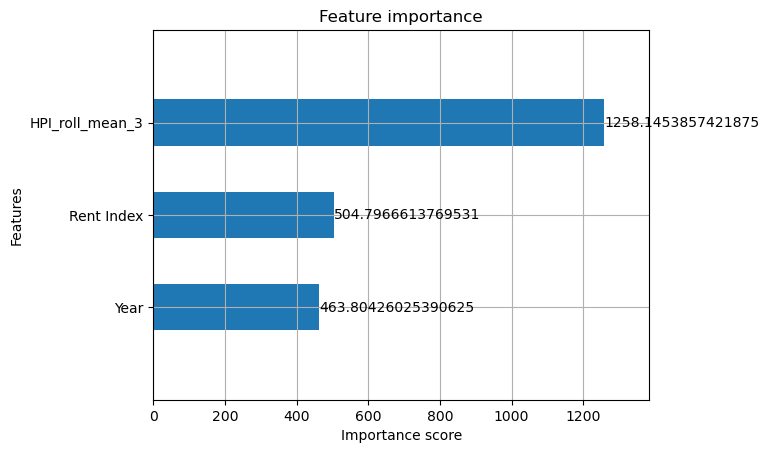

In [116]:
plot_importance(model, height=0.5, importance_type='gain', max_num_features=10)
plt.show()

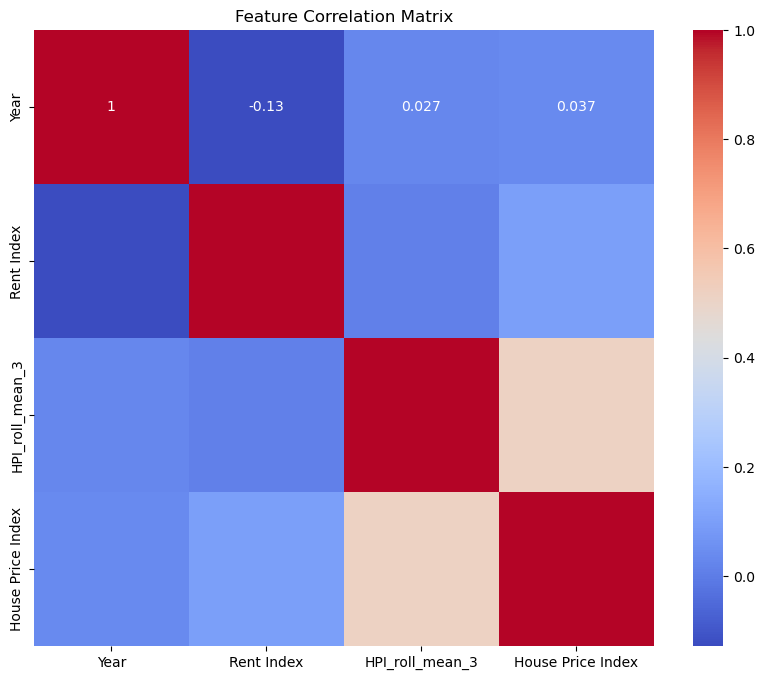

In [117]:
corr_matrix = hpi_index[features + [target]].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

In [118]:
hpi_index


,Country,Year,House Price Index,Rent Index,Affordability Ratio,Mortgage Rate (%),Inflation Rate (%),GDP Growth (%),Population Growth (%),Urbanization Rate (%),...,latitude,longitude,HPI_YoY_Change,Year_num,HPI_lag_1,HPI_lag_2,HPI_roll_mean_3,HPI_roll_std_3,Economic_Stress,Period_Pre-COVID
0,Australia,2015,151.334959,112.664479,7.605097,4.160567,1.196618,1.579299,0.864160,67.274115,...,-25.274398,133.775136,NaN,2015,130.320978,130.572335,130.375426,26.121754,3.777887,True
1,Australia,2016,117.728416,51.404984,5.898712,2.557240,2.628733,-1.041903,2.116845,77.807774,...,-25.274398,133.775136,-22.206728,2016,151.334959,130.572335,130.375426,26.121754,6.227876,True
2,Australia,2017,158.917124,84.890954,3.782283,4.185533,4.314467,3.963516,0.510808,63.827409,...,-25.274398,133.775136,34.986207,2017,117.728416,151.334959,142.660166,21.921825,4.536484,True
3,Australia,2018,116.308230,95.214207,8.137005,3.280484,6.912349,2.846199,-0.169706,63.053474,...,-25.274398,133.775136,-26.812022,2018,158.917124,117.728416,130.984590,24.200704,7.346634,True
4,Australia,2019,104.595773,61.247696,4.679103,2.925476,1.626928,5.174123,-0.719182,75.735342,...,-25.274398,133.775136,-10.070187,2019,116.308230,158.917124,126.607042,28.587610,-0.621719,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,USA,2020,146.252228,71.819775,7.680612,4.233551,1.701554,5.756677,1.712965,88.184968,...,37.090240,-95.712891,32.401236,2020,110.461377,131.423444,129.379016,17.982798,0.178428,False
196,USA,2021,139.789998,114.531196,3.796433,2.479914,0.793977,0.602643,0.360371,68.140471,...,37.090240,-95.712891,-4.418552,2021,146.252228,110.461377,132.167868,19.074038,2.671249,False
197,USA,2022,115.675333,69.665416,7.884265,2.204621,5.714280,-1.403595,2.454104,83.167343,...,37.090240,-95.712891,-17.250637,2022,139.789998,146.252228,133.905853,16.115335,9.322496,False
198,USA,2023,80.552212,107.082300,9.361716,5.145036,5.513257,-1.407643,0.254630,63.476072,...,37.090240,-95.712891,-30.363536,2023,115.675333,139.789998,112.005847,29.788885,12.065936,False


In [120]:
#extracting the dataset to be used for visualisation in Power BI

hpi_index.to_csv("/Users/julius/Personal/Personal_Project/House_market_analysis/Global-Housing-Market-Analysis/Dataset/House_Market_Price.csv", index=False)
